In [19]:
# Import dependencies
import pandas as pd
import numpy as np
import glob
import pprint
import os

# Lsit all the excel files in the folder 
    #!ls OptionsData/*.xls
# Create a new DataFrame
all_data = pd.DataFrame()
# Loop thru the excel files saved in Stock Option data folder;
    # use glob function retrieve file names from file path, then input in a new column for each file
for f in glob.glob("OptionsData/*.xls"):
    df = pd.read_excel(f)
    basefilename = os.path.basename(f)
    df['filename'] = os.path.splitext(basefilename)[0]
    all_data = all_data.append(df,ignore_index=True)
    
#pprint.pprint(all_data)
# Save & export combined data into CSV
all_data.to_csv("Combined_Options_Data.csv")

In [30]:
# creat a ticker dataframe
filter_ticker_AMR = pd.DataFrame([{'Stk-Sym':'AMR'}])
# use the ticker dataframe as a query key, quote the put option data per each ticker by using merge function
filtered_data_AMR = pd.merge(filter_ticker_AMR,all_data,how='left')
filtered_data_AMR = filtered_data_AMR.rename(columns = 
                                             {"Stk-Sym":"ticker", 
                                              "Put ADV":"Daily_Puts",
                                              "filename":"Months"})
#filtered_data_AMR.dtypes
filtered_data_AMR.head()

,ticker,opt_symbol,name,Total,Call,Put,Trade Days,Tot ADV,Call ADV,Daily_Puts,Months
0,AMR,AMR,AMR CORP.,4382.0,3745.0,637.0,19.0,231.0,197.0,34.0,2000.09
1,AMR,AMR,AMR CORP.,3009.0,1477.0,1532.0,22.0,137.0,67.0,70.0,2000.10
2,AMR,AMR,AMR CORP.,2712.0,2208.0,504.0,21.0,129.0,105.0,24.0,2000.11
3,AMR,AMR,AMR CORP.,4335.0,3115.0,1220.0,20.0,217.0,156.0,61.0,2000.12
4,AMR,AMR,AMR CORP.,4384.0,3138.0,1246.0,21.0,209.0,149.0,59.0,2001.01


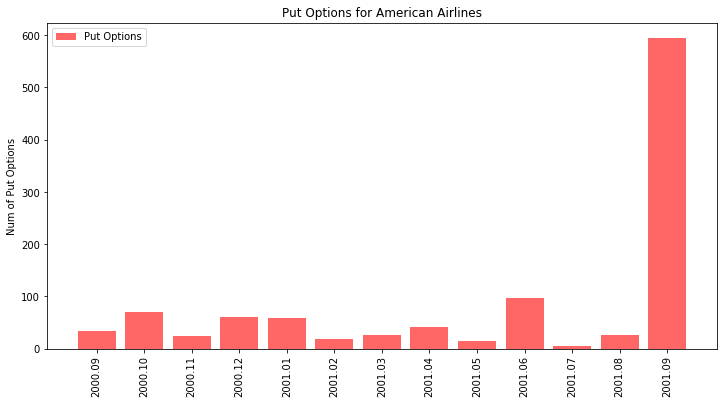

In [31]:
# re-format daily put options data from "float64" to "numeric"
filtered_data_AMR.Daily_Puts = pd.to_numeric(filtered_data_AMR.Daily_Puts)

#P lot
import matplotlib.pyplot as plt
# Set x axis and tick locations
x_axis = np.arange(len(filtered_data_AMR))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(12,6))
plt.bar(x_axis, filtered_data_AMR["Daily_Puts"], color='r', 
        alpha=0.6, align="center",label="Put Options")
plt.xticks(tick_locations, filtered_data_AMR["Months"], rotation="vertical")
plt.ylabel('Num of Put Options')
plt.title('Put Options for American Airlines')
plt.legend()

In [32]:
# repeat above for quoting Merrill Lynch
filter_ticker_MER = pd.DataFrame([{'Stk-Sym':'MER'}])
#print(filter_ticker)
filtered_data_MER = pd.merge(filter_ticker_MER,all_data,how='left')
filtered_data_MER = filtered_data_MER.rename(columns = {"Stk-Sym":"ticker", "Put ADV":"Daily_Puts","filename":"Months"})
filtered_data_MER.head()

,ticker,opt_symbol,name,Total,Call,Put,Trade Days,Tot ADV,Call ADV,Daily_Puts,Months
0,MER,MER,MERRILL LYNCH,27116.0,14593.0,12523.0,19.0,1427.0,768.0,659.0,2000.09
1,MER,MER,MERRILL LYNCH,48455.0,23254.0,25201.0,22.0,2203.0,1057.0,1146.0,2000.10
2,MER,MER,MERRILL LYNCH,28750.0,19387.0,9363.0,21.0,1369.0,923.0,446.0,2000.11
3,MER,MER,MERRILL LYNCH,22511.0,13724.0,8787.0,20.0,1126.0,686.0,439.0,2000.12
4,MER,MER,MERRILL LYNCH,38378.0,20378.0,18000.0,21.0,1828.0,970.0,857.0,2001.01


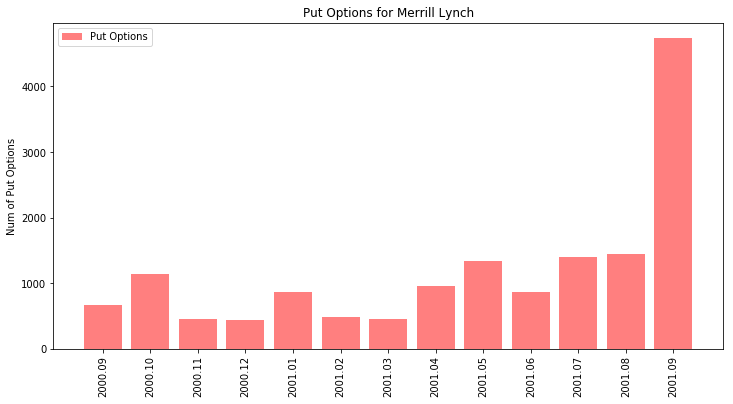

In [34]:
# re-format daily put options data from "float64" to "numeric"
filtered_data_MER.Daily_Puts = pd.to_numeric(filtered_data_MER.Daily_Puts)

# Set x axis and tick locations
x_axis = np.arange(len(filtered_data_MER))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(12,6))
plt.bar(x_axis, filtered_data_MER["Daily_Puts"], color='r', alpha=0.5, align="center",label="Put Options")
plt.xticks(tick_locations, filtered_data_MER["Months"], rotation="vertical")

plt.ylabel('Num of Put Options')
plt.title('Put Options for Merrill Lynch')
plt.legend()